In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np

In [ ]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
df_dict = {
    'Country': ['Nigeria', 'Kenya', 'Togo'],
    'Capital': ['Abuja', 'Nairobi', 'Lome'],
    'Population': [3000, 40000, 2000],
    'Age': [50, 40, 60]
}

In [ ]:
df = pd.DataFrame(df_dict, index=[2, 4, 6])
df

,Country,Capital,Population,Age
2,Nigeria,Abuja,3000,50
4,Kenya,Nairobi,40000,40
6,Togo,Lome,2000,60


In [ ]:
df.loc[df['Age'] == 50]

,Country,Capital,Population,Age
2,Nigeria,Abuja,3000,50


In [ ]:
df.at[2, 'Age']

50

In [ ]:
df_dict2 = {
    'Name': ['James', 'Bob', 'Abisola', np.nan],
    'Profession': ['Banker', 'Lawyer', 'Doctor', 'Professor'],
    'Experience': [3, np.nan, 5, 10],
    'Height': [np.nan, 175, 180, 183]
}

In [ ]:
df2 = pd.DataFrame(df_dict2)
df2

,Name,Profession,Experience,Height
0,James,Banker,3.0,NaN
1,Bob,Lawyer,NaN,175.0
2,Abisola,Doctor,5.0,180.0
3,NaN,Professor,10.0,183.0


In [ ]:
df2.isnull().sum()

Name          1
Profession    0
Experience    1
Height        1
dtype: int64

In [ ]:
#df2.dropna(thresh=2)
df2.dropna()

,Name,Profession,Experience,Height
2,Abisola,Doctor,5.0,180.0


In [ ]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
df3 = pd.read_csv(url, error_bad_lines=False)
df3.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [ ]:
df3.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [ ]:
df3.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
(df3.loc[df3['fuel_unit'].isnull()])

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,NaN,3547.0,5.606160,41.930,41.770,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,NaN,43461380.0,3.412600,1.654,0.000,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.000,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,NaN,401216.0,0.127467,78.446,0.000,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,NaN,313736.0,0.119756,57.534,0.000,0.480
...,...,...,...,...,...,...,...,...,...,...,...
28413,f1_fuel_2017_12_227_0_13,227,2017,vestaburg,gas,NaN,24196.0,1.000000,20.131,4.494,4.494
28828,f1_fuel_2018_12_148_0_12,148,2018,northeastern 3,oil,NaN,11.0,4.966164,64.080,64.080,12.860
28830,f1_fuel_2018_12_148_0_14,148,2018,comanche,oil,NaN,96.0,5.751942,34.130,34.130,5.930
29052,f1_fuel_2018_12_162_0_1,162,2018,ernest c. gaston,coal,NaN,1610370.0,21.660000,70.461,65.240,3.254


In [ ]:
df3.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [ ]:
df3.fillna('mcf', inplace=True)
df3.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [ ]:
df3['fuel_unit'].value_counts()

mcf       11534
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [ ]:
#df3.groupby('report_year')['report_year'].count()
df3.groupby('report_year')['fuel_type_code_pudl'].first()

report_year
1994       coal
1995      waste
1996    nuclear
1997       coal
1998       coal
1999       coal
2000       coal
2001       coal
2002       coal
2003        gas
2004       coal
2005       coal
2006       coal
2007       coal
2008       coal
2009       coal
2010       coal
2011       coal
2012       coal
2013       coal
2014       coal
2015        oil
2016        oil
2017        oil
2018        oil
Name: fuel_type_code_pudl, dtype: object

In [ ]:
df3.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [ ]:
fuel1 = df3.iloc[:19000].reset_index(drop=True)
fuel2 = df3.iloc[19000:].reset_index(drop=True)

In [ ]:
assert len(df3) == (len(fuel1) + len(fuel2))

In [ ]:
#pd.merge(fuel1, fuel2, how='inner')
len(pd.merge(fuel1, fuel2, how='left')), len(df3)
#len(pd.merge(fuel1, fuel2, how='outer')), len(df3)

(19000, 29523)

In [ ]:
pd.concat([fuel1, fuel2]).reset_index(drop=True)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [ ]:
fuel_unit = pd.DataFrame({
    'unit': ['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
    'count': [7798, 84, 464, 110, 11354, 180, 95, 100, 8958]
})

In [ ]:
alt.Chart(fuel_unit).mark_bar().encode(
    x= alt.X('unit', title='Fuel Unit'),
    y='count'
).properties(
    width=600,
    height=400
)

alt.Chart(...)

Text(0.5, 0, 'Fuel Unit')

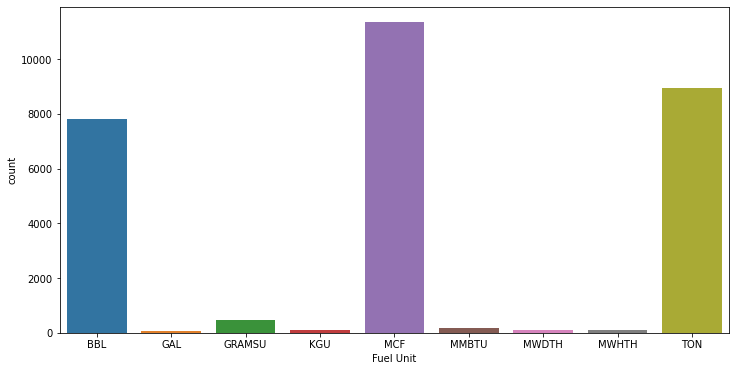

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')

(1, 12000)

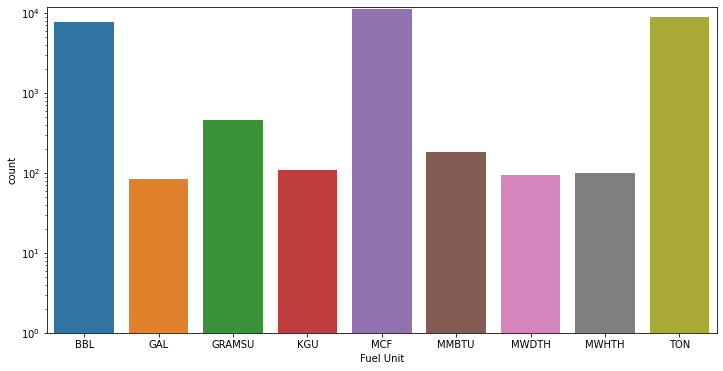

In [ ]:
plt.figure(figsize=(12,6))
g = sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')
g.set_yscale('log')
g.set_ylim(1, 12000)